In [25]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.layers import Dropout

from keras.models import load_model

import tensorflow as tf
sess = tf.InteractiveSession()

In [26]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# load  dataset
dataset = pd.read_csv('/home_l/francovm/Projects/SSE/data/processed/input_data.csv', sep='\t', encoding='utf-8' ,index_col=0)


# split into input (X) and output (Y) variables

train_X = dataset.drop(columns=['Events'])

# one-hot encode target column
train_Y = to_categorical(dataset.Events)


#get number of columns in training data
n_cols = train_X.shape[1]


In [27]:
dataset.columns

Index(['x', 'error', 'n', 'n_error', 'u', 'u_error', 'Events'], dtype='object')

In [28]:
# partition the data into training and testing splits using 66% of
# the data for training and the remaining 33% for testing
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.33, random_state=seed)

In [29]:
X_train.head()

,x,error,n,n_error,u,u_error
144713,-41.89,2.17,90.36,2.41,-1.40,8.70
202164,34.15,1.84,-47.02,2.03,0.79,7.06
175681,-16.90,2.13,87.81,2.19,-22.43,8.51
73565,-3.32,2.21,118.61,2.15,-5.72,8.15
151695,47.91,1.31,-80.90,1.49,0.01,4.98


In [30]:
y_train

# plt.plot(y_train)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [31]:
model_2 = Sequential()

#add layers to model
model_2.add(Dense(512, activation='relu', input_shape=(n_cols,)))
# model_2.add(Dropout(0.5))
model_2.add(Dense(512, activation='relu'))
model_2.add(Dropout(0.2))
model_2.add(Dense(2, activation='sigmoid'))

# Compile model

model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=5)

# Fit the model



history = model_2.fit(X_train,y_train, 
                      epochs=64, 
                      validation_split=0.3, 
                      callbacks=[early_stopping_monitor])

# history = model_2.fit(train_X,train_Y, epochs=40, validation_data=(X_test,y_test), callbacks=[early_stopping_monitor])



Train on 106799 samples, validate on 45771 samples
Epoch 1/64
106799/106799 [==============================] - 27s 251us/step - loss: 0.2285 - acc: 0.9557 - val_loss: 0.1654 - val_acc: 0.9585
Epoch 2/64
106799/106799 [==============================] - 26s 247us/step - loss: 0.1764 - acc: 0.9558 - val_loss: 0.1647 - val_acc: 0.9585
Epoch 3/64
106799/106799 [==============================] - 26s 246us/step - loss: 0.1739 - acc: 0.9558 - val_loss: 0.1655 - val_acc: 0.9585
Epoch 4/64
106799/106799 [==============================] - 26s 247us/step - loss: 0.1726 - acc: 0.9558 - val_loss: 0.1596 - val_acc: 0.9585
Epoch 5/64
106799/106799 [==============================] - 26s 247us/step - loss: 0.1718 - acc: 0.9558 - val_loss: 0.1639 - val_acc: 0.9585
Epoch 6/64
106799/106799 [==============================] - 27s 249us/step - loss: 0.1710 - acc: 0.9558 - val_loss: 0.1601 - val_acc: 0.9585
Epoch 7/64
106799/106799 [==============================] - 26s 246us/step - loss: 0.1697 - acc: 0.9558

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


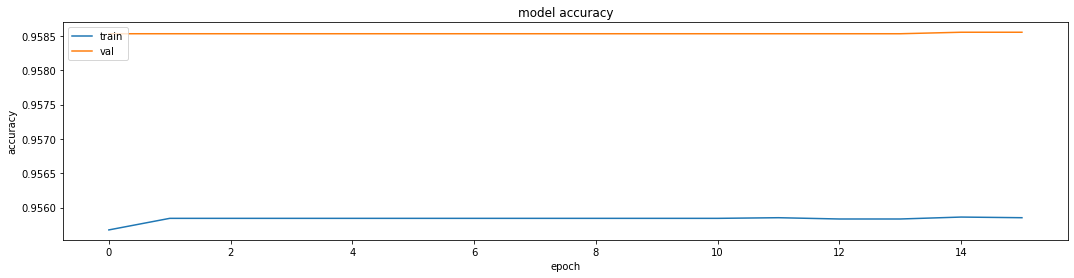

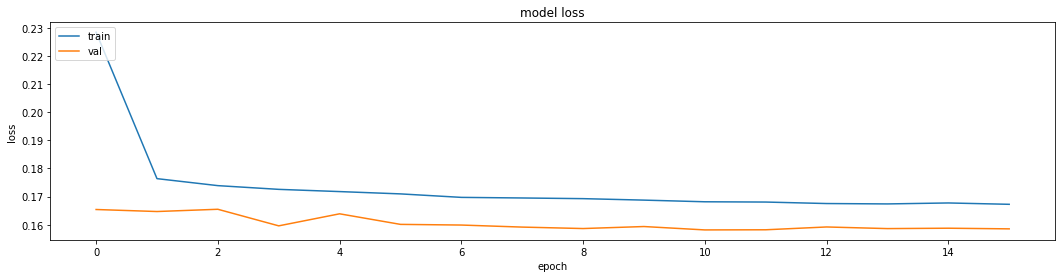

In [33]:
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

# Get current size
fig_size = plt.rcParams["figure.figsize"]
#  Set figure width to 18 and height to 4
fig_size[0] = 18
fig_size[1] = 4
plt.rcParams["figure.figsize"] = fig_size

plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
 # Get current size
fig_size = plt.rcParams["figure.figsize"]

# Set figure width to 18 and height to 4
fig_size[0] = 18
fig_size[1] = 4
plt.rcParams["figure.figsize"] = fig_size

plt.show()

In [34]:
# evaluate the model
scores = model_2.evaluate(X_test,y_test)
print((scores[1]*100))

75147/75147 [==============================] - 5s 65us/step
95.52344072324647


In [35]:
y_test

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [36]:
ynew = model_2.predict(X_test)

# ynew = np.argmax(ynew[:])

In [37]:
ynew.shape

(75147, 2)

In [38]:
ynew

array([[9.9405652e-01, 1.2203726e-01],
       [9.9996555e-01, 5.6957960e-02],
       [1.0000000e+00, 7.1048737e-05],
       ...,
       [1.0000000e+00, 1.9473523e-02],
       [8.6587131e-01, 2.1610320e-01],
       [1.0000000e+00, 4.2114805e-02]], dtype=float32)

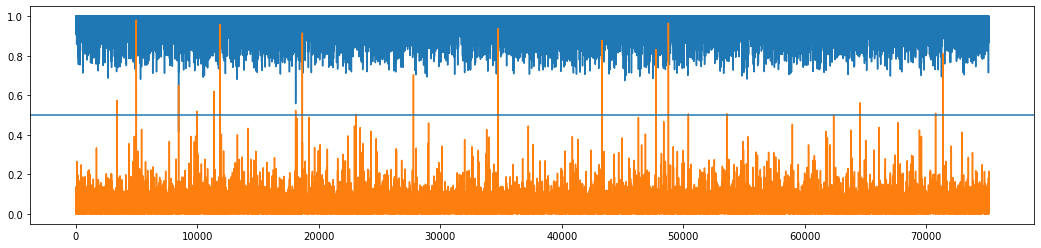

In [44]:
plt.plot(ynew) # plotting by columns
plt.axhline(0.5)
plt.show()

In [97]:
ynew

array([[2.0386726e-01],
       [6.5261841e-02],
       [1.4901161e-07],
       ...,
       [3.8702101e-02],
       [1.1518244e-01],
       [6.2616006e-02]], dtype=float32)

# Save the Model (Keras)

In [49]:
# save model and architecture to single file
model_2.save("/home_l/francovm/Projects/SSE/models/Binary_clasifier_NN_SSE_95.h5")

In [ ]:
# # load model
# model = load_model('NN_SSE_95.h5')
# # summarize model.
# model.summary()



In [ ]:
# # load dataset
# dataset = loadtxt("pima-indians-diabetes.csv", delimiter=",")
# # split into input (X) and output (Y) variables
# X = dataset[:,0:8]
# Y = dataset[:,8]
# # evaluate the model
# score = model.evaluate(X, Y, verbose=0)
# print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))